In [44]:
# import python libraries

import numpy as np
import pandas as pd 
import sklearn.datasets
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [45]:
# import csv file
df = pd.read_csv('Diwali Sales Data.csv', encoding='unicode_escape')

In [46]:
df.shape

(11251, 15)

In [47]:
df.size

168765

In [48]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [49]:
df.tail()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN
11250,1002744,Brumley,P00281742,F,18-25,19,0,Maharashtra,Western,Healthcare,Office,3,188.0,NaN,NaN


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [51]:
df.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
Status              float64
unnamed1            float64
dtype: object

In [52]:
#drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [53]:
df.shape

(11251, 13)

In [54]:
#check for null values
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [55]:
# drop null values
df.dropna(inplace=True)

In [56]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [57]:
df['Amount'].dtypes

dtype('int32')

In [58]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [59]:
#rename column
df.rename(columns={'Marital_Status':'Marry'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marry,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [60]:
df['Marital_Status']= df['Marital_Status'].replace({0: 'Unmarried'}) 
df['Marital_Status']= df['Marital_Status'].replace({1: 'Married'}) 

In [61]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,User_ID,Age,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,2.489634,9453.610553
std,1.716039e+03,12.753866,1.114967,5222.355168
min,1.000001e+06,12.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,4.000000,23952.000000


In [62]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [63]:
df['State'].unique()

array(['Maharashtra', 'Andhra\xa0Pradesh', 'Uttar Pradesh', 'Karnataka',
       'Gujarat', 'Himachal Pradesh', 'Delhi', 'Jharkhand', 'Kerala',
       'Haryana', 'Madhya Pradesh', 'Bihar', 'Rajasthan', 'Uttarakhand',
       'Telangana', 'Punjab'], dtype=object)

In [64]:
df['State'].nunique()

16

In [65]:
df['Occupation'].unique()

array(['Healthcare', 'Govt', 'Automobile', 'Construction',
       'Food Processing', 'Lawyer', 'Media', 'Banking', 'Retail',
       'IT Sector', 'Aviation', 'Hospitality', 'Agriculture', 'Textile',
       'Chemical'], dtype=object)

In [66]:
df['Occupation'].nunique()

15

In [67]:
df['Age Group'].unique()

array(['26-35', '0-17', '18-25', '51-55', '46-50', '55+', '36-45'],
      dtype=object)

In [68]:
df['Zone'].unique()

array(['Western', 'Southern', 'Central', 'Northern', 'Eastern'],
      dtype=object)

In [69]:
df['Product_Category'].unique()

array(['Auto', 'Hand & Power Tools', 'Stationery', 'Tupperware',
       'Footwear & Shoes', 'Furniture', 'Food', 'Games & Toys',
       'Sports Products', 'Books', 'Electronics & Gadgets', 'Decor',
       'Clothing & Apparel', 'Beauty', 'Household items', 'Pet Care',
       'Veterinary', 'Office'], dtype=object)

In [102]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,Unmarried,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,Unmarried,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877


Data Cleaning is done now.

# Exploratory Data Analysis

# What is the distribution of customers based on gender, age group?

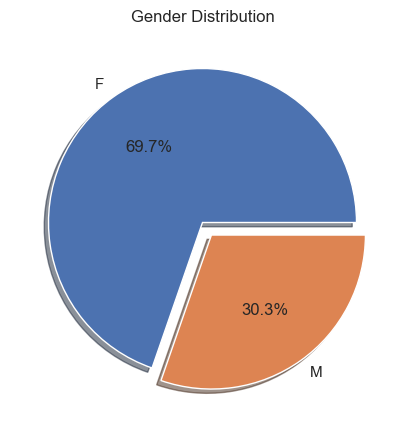

In [97]:
#GENDER

# Calculate the counts for each gender
gender_counts = df['Gender'].value_counts()

# plot
plt.pie(gender_counts, labels=gender_counts.index, autopct='%.1f%%', shadow = True, explode = [0, 0.1])
plt.title('Gender Distribution')
plt.show()

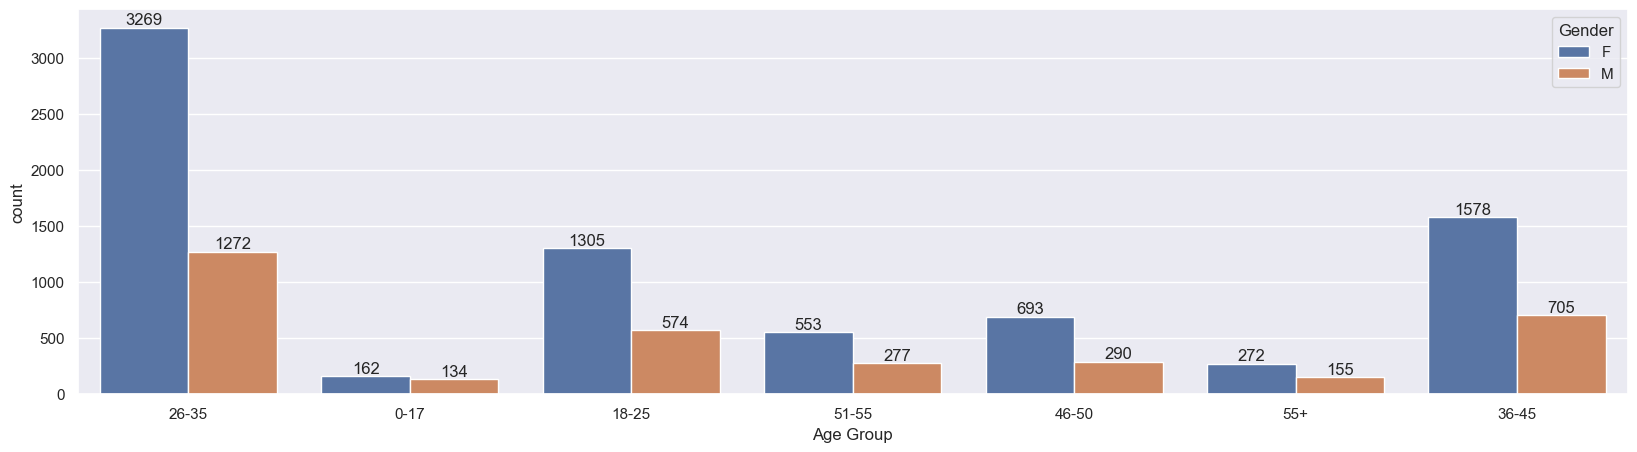

In [99]:
#AGE

ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for count_of_age in ax.containers:
    ax.bar_label(count_of_age)

# Which Age Group have the highest puchasing power and number of orders?

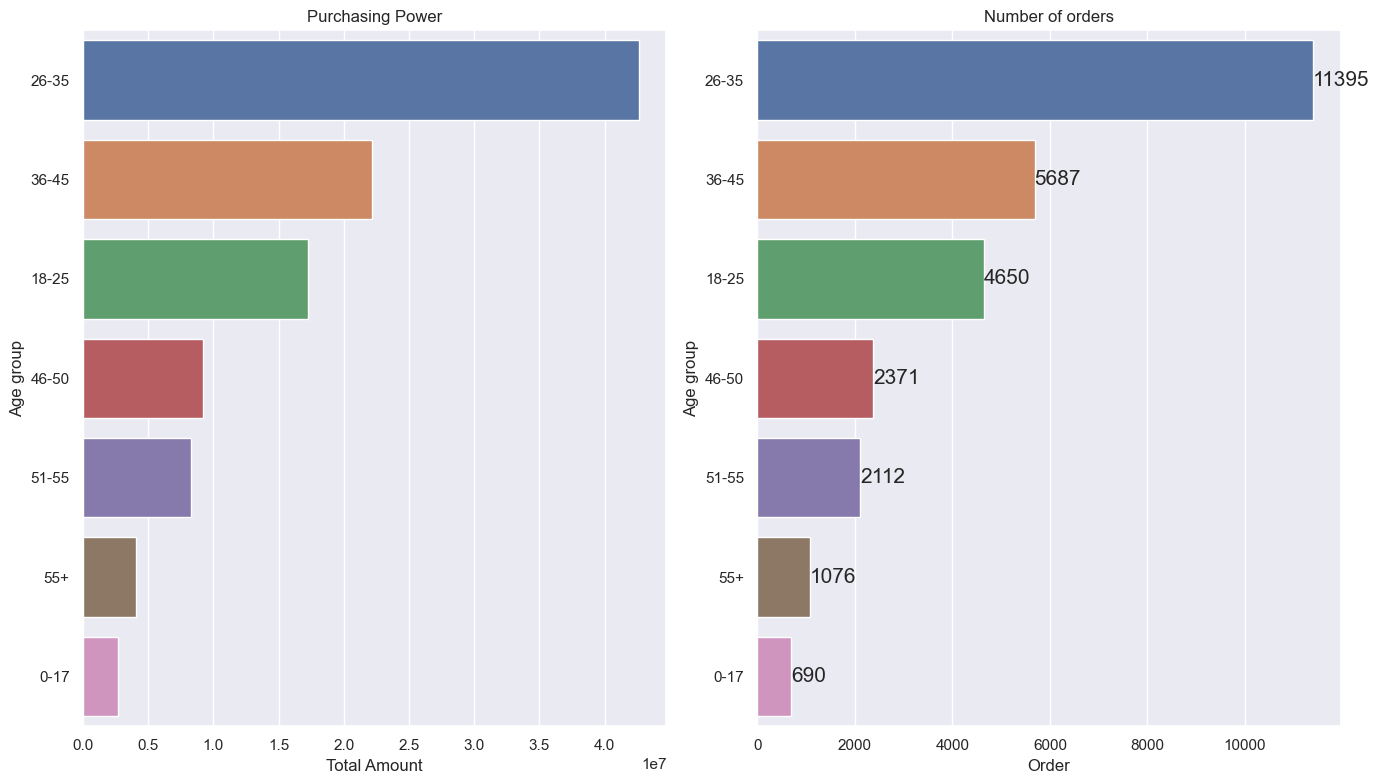

In [103]:
sales_age_amt = df.groupby(['Age Group'])['Amount'].sum().sort_values(ascending=False)
sales_age_order = df.groupby(['Age Group'])['Orders'].sum().sort_values( ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

sns.barplot(x=sales_age_amt.values, y=sales_age_amt.index, ax = ax1)
ax1.set_xlabel('Total Amount')
ax1.set_ylabel('Age group')
ax1.set_title('Purchasing Power')

ax2 = sns.barplot(x=sales_age_order.values, y=sales_age_order.index)

for count_of_orders in ax2.containers:
    ax2.bar_label(count_of_orders, fontsize = 15)
    
ax2.set_xlabel('Order')
ax2.set_ylabel('Age group')
ax2.set_title('Number of orders')

plt.tight_layout()
plt.show()

# What is the distribution of customers based on marital status?

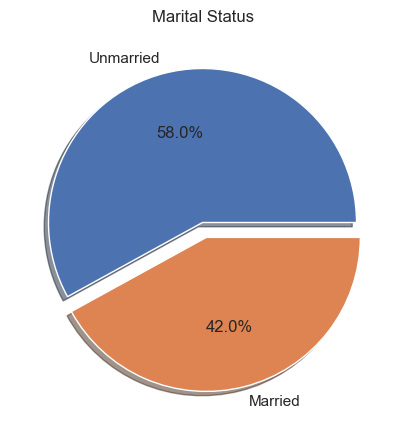

In [96]:
#Marital Status

# Calculate the counts 
maritalStatus_counts = df['Marital_Status'].value_counts()

# plot
plt.pie(maritalStatus_counts, labels=maritalStatus_counts.index, autopct='%.1f%%', shadow = True, explode = [0, 0.1])
plt.title('Marital Status')
plt.show()

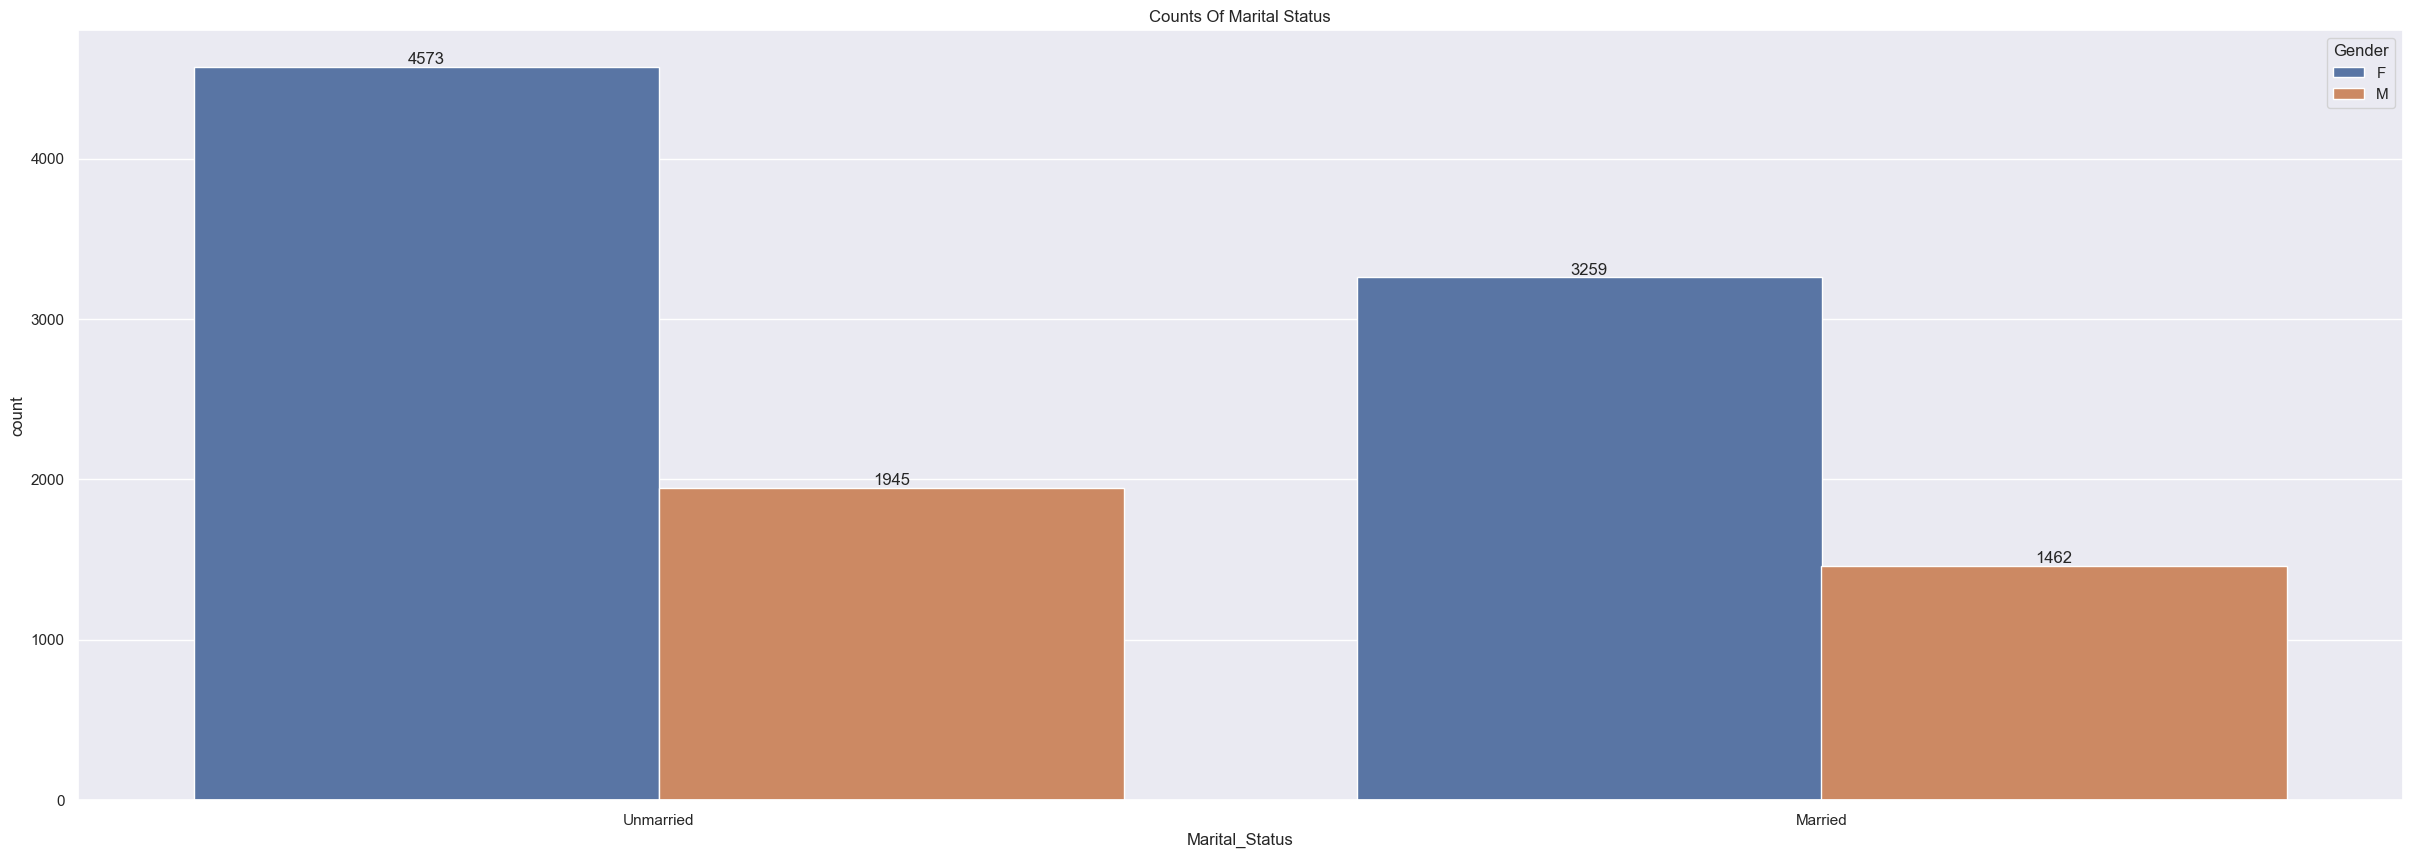

In [74]:
ax = sns.countplot(data = df, x = 'Marital_Status', hue = 'Gender')
ax.set(title = 'Counts Of Marital Status')

for count_of_maritalStatus in ax.containers:
    ax.bar_label(count_of_maritalStatus)

# Number of customers in different zones

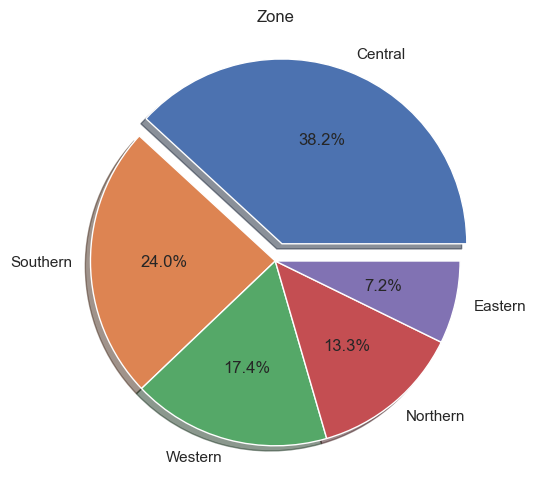

In [75]:
# Calculate the counts 
Zone_counts = df['Zone'].value_counts()

# plot

plt.figure(figsize=(8, 6)) 
plt.pie(Zone_counts, labels=Zone_counts.index, shadow = True, explode = [0.1,0,0,0,0])
plt.title('Zone')
plt.show()



# Number of Orders in different Zone

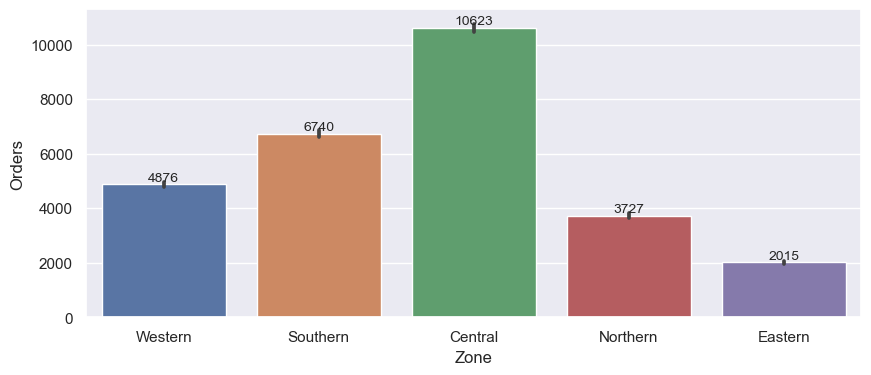

In [76]:
sns.set(rc={'figure.figsize':(10,4)})
ax = sns.barplot(data = df, x = 'Zone', y= 'Orders', estimator = sum)

for count_of_orders in ax.containers:
    ax.bar_label(count_of_orders, fontsize = 10)

# Sales distribution in different Zone

<Axes: xlabel='Zone', ylabel='Amount'>

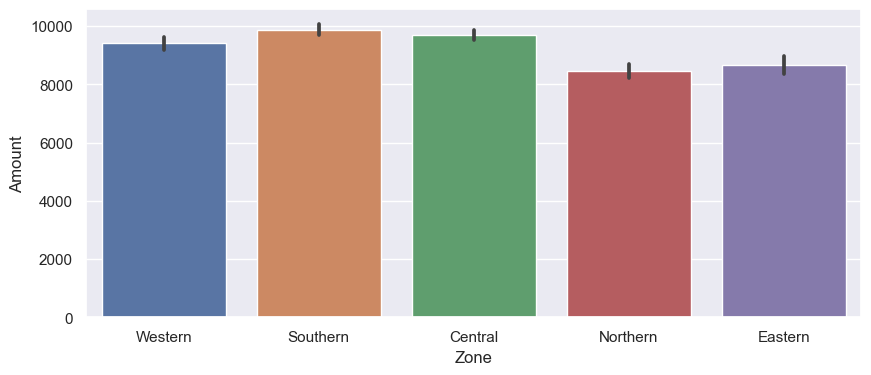

In [77]:
sns.set(rc={'figure.figsize':(10,4)})
sns.barplot(data = df, x = 'Zone', y= 'Amount')

# Number of customers for different product category

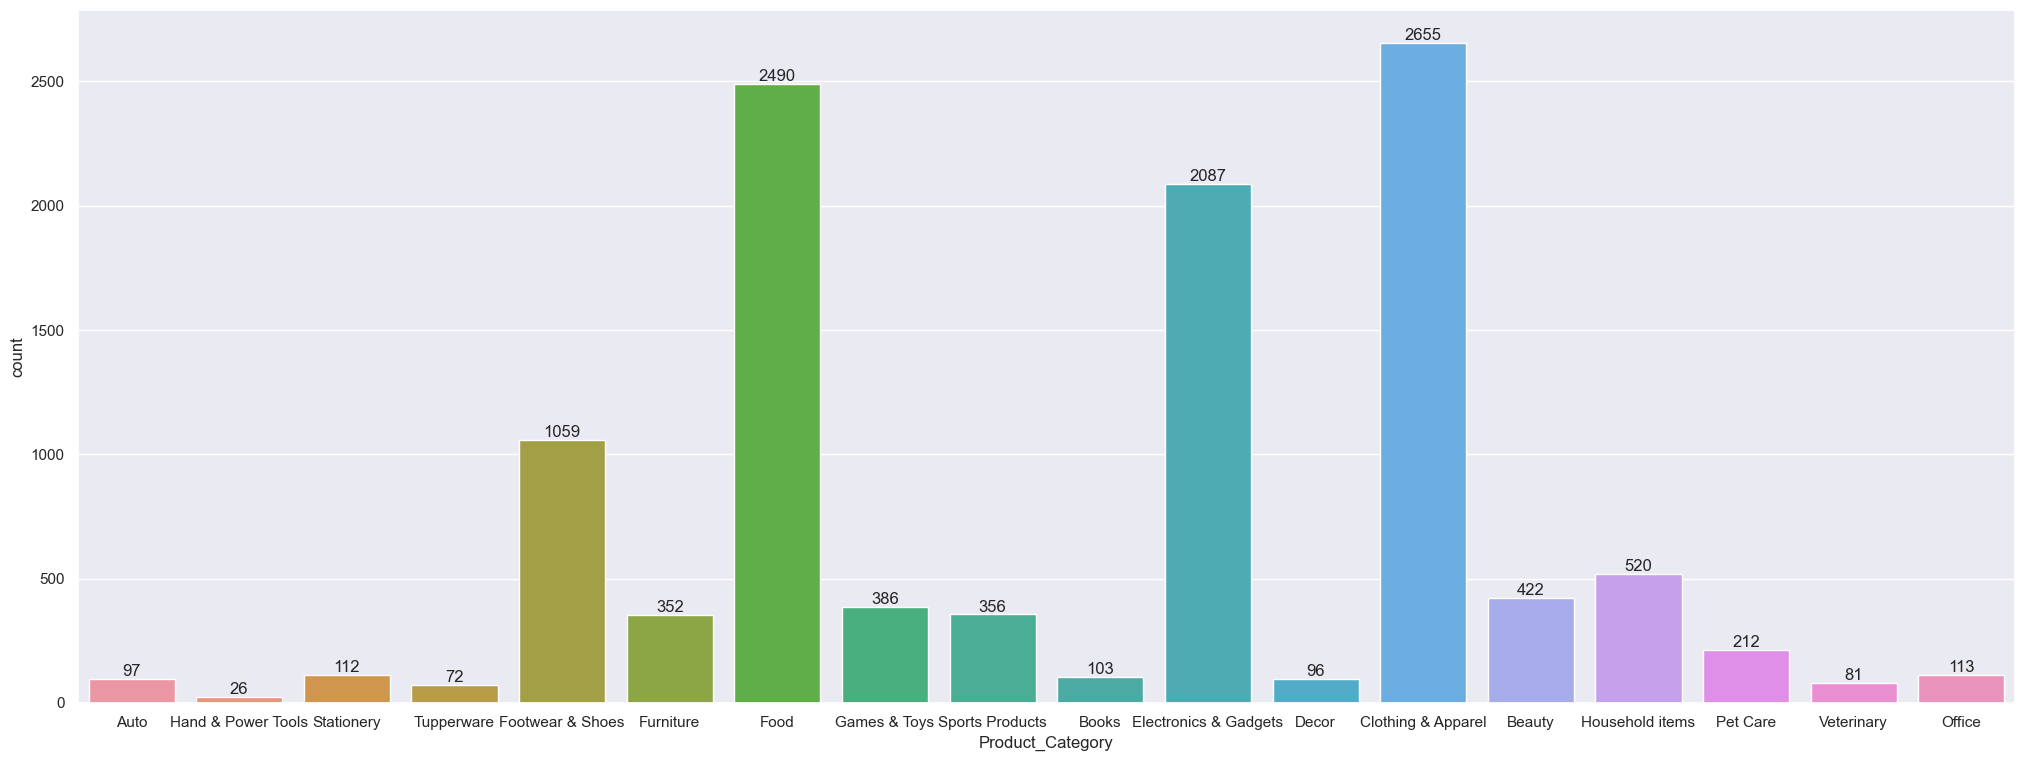

In [78]:
sns.set(rc={'figure.figsize':(25,9)})
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

# Which Product category has the highest number of orders?

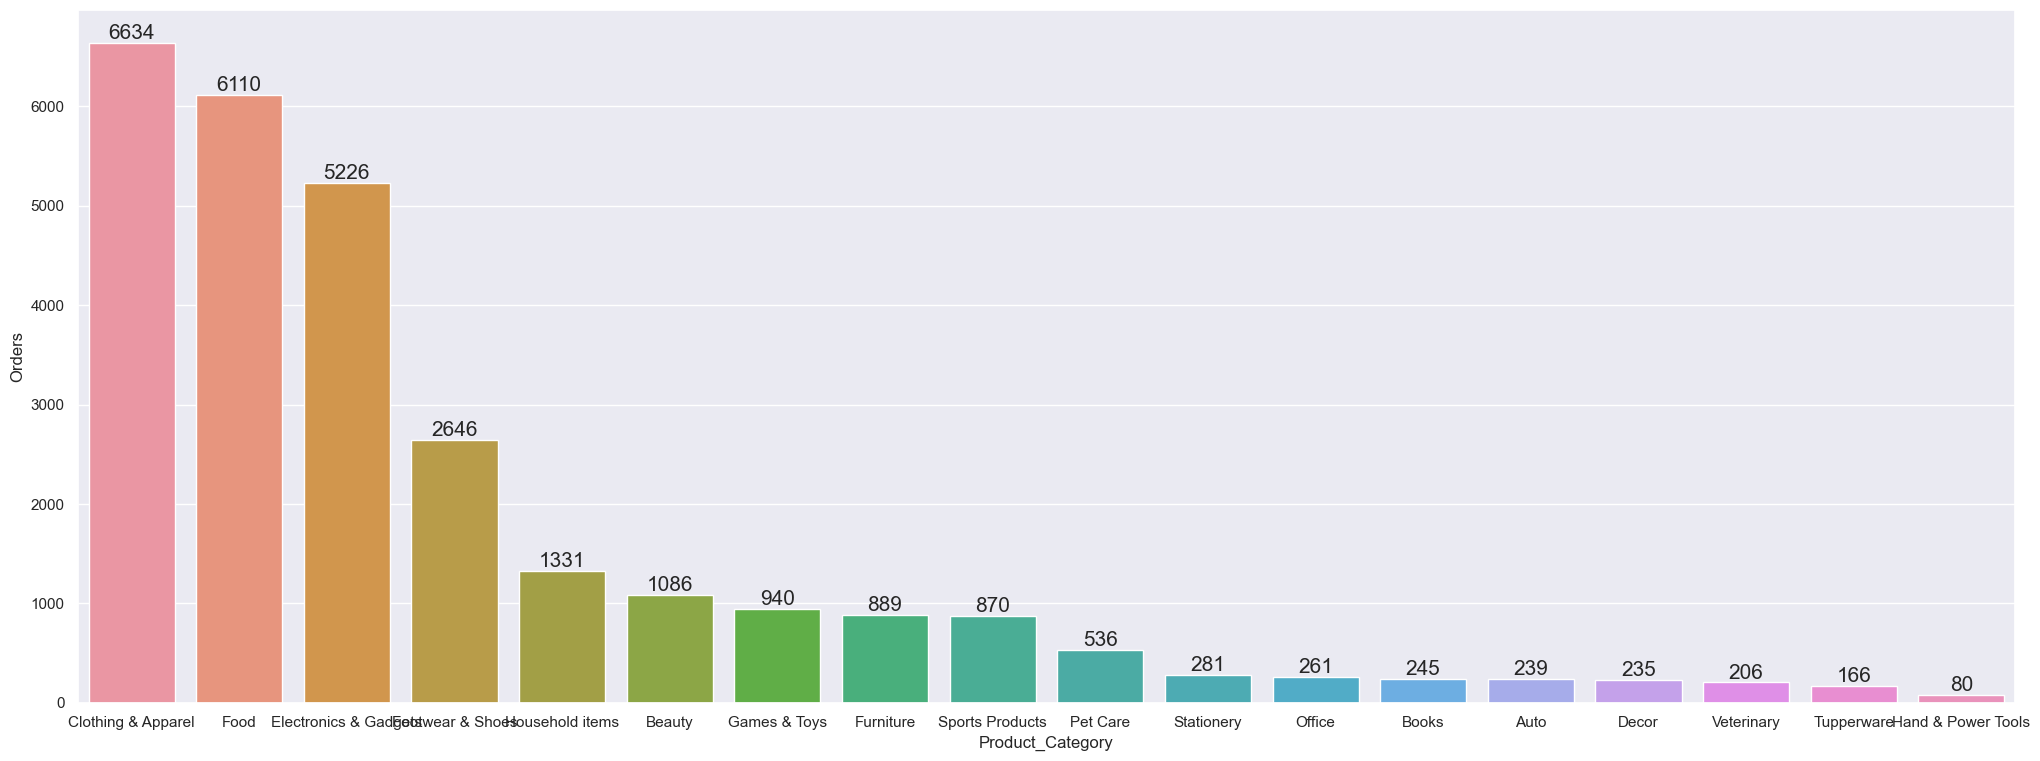

In [79]:
sales_age = df.groupby(['Product_Category'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False)

sns.set(rc={'figure.figsize':(25,9)})
ax = sns.barplot(x='Product_Category', y='Orders', data = sales_age)

for count_of_orders in ax.containers:
    ax.bar_label(count_of_orders, fontsize = 15)

# Which top 5 product categories have the highest total sales?

<Axes: xlabel='Product_Category', ylabel='Amount'>

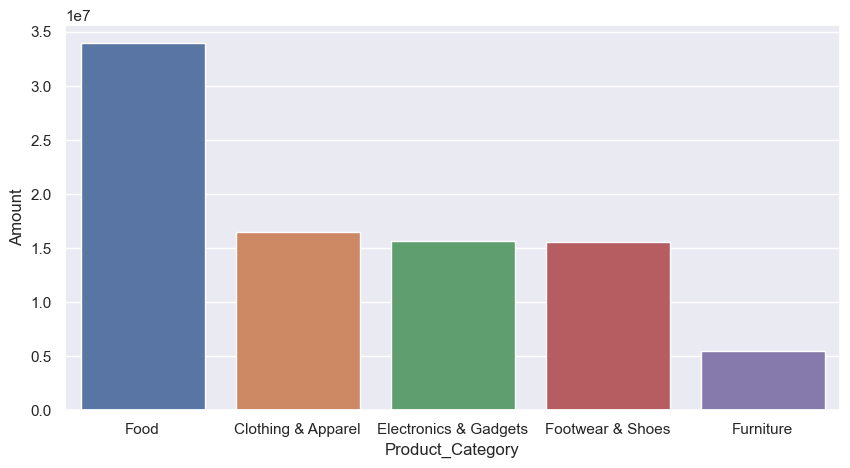

In [80]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(5)

sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(data = sales_state , x = 'Product_Category',y= 'Amount')

# Graph showing total amount for each zone and for particular age group

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


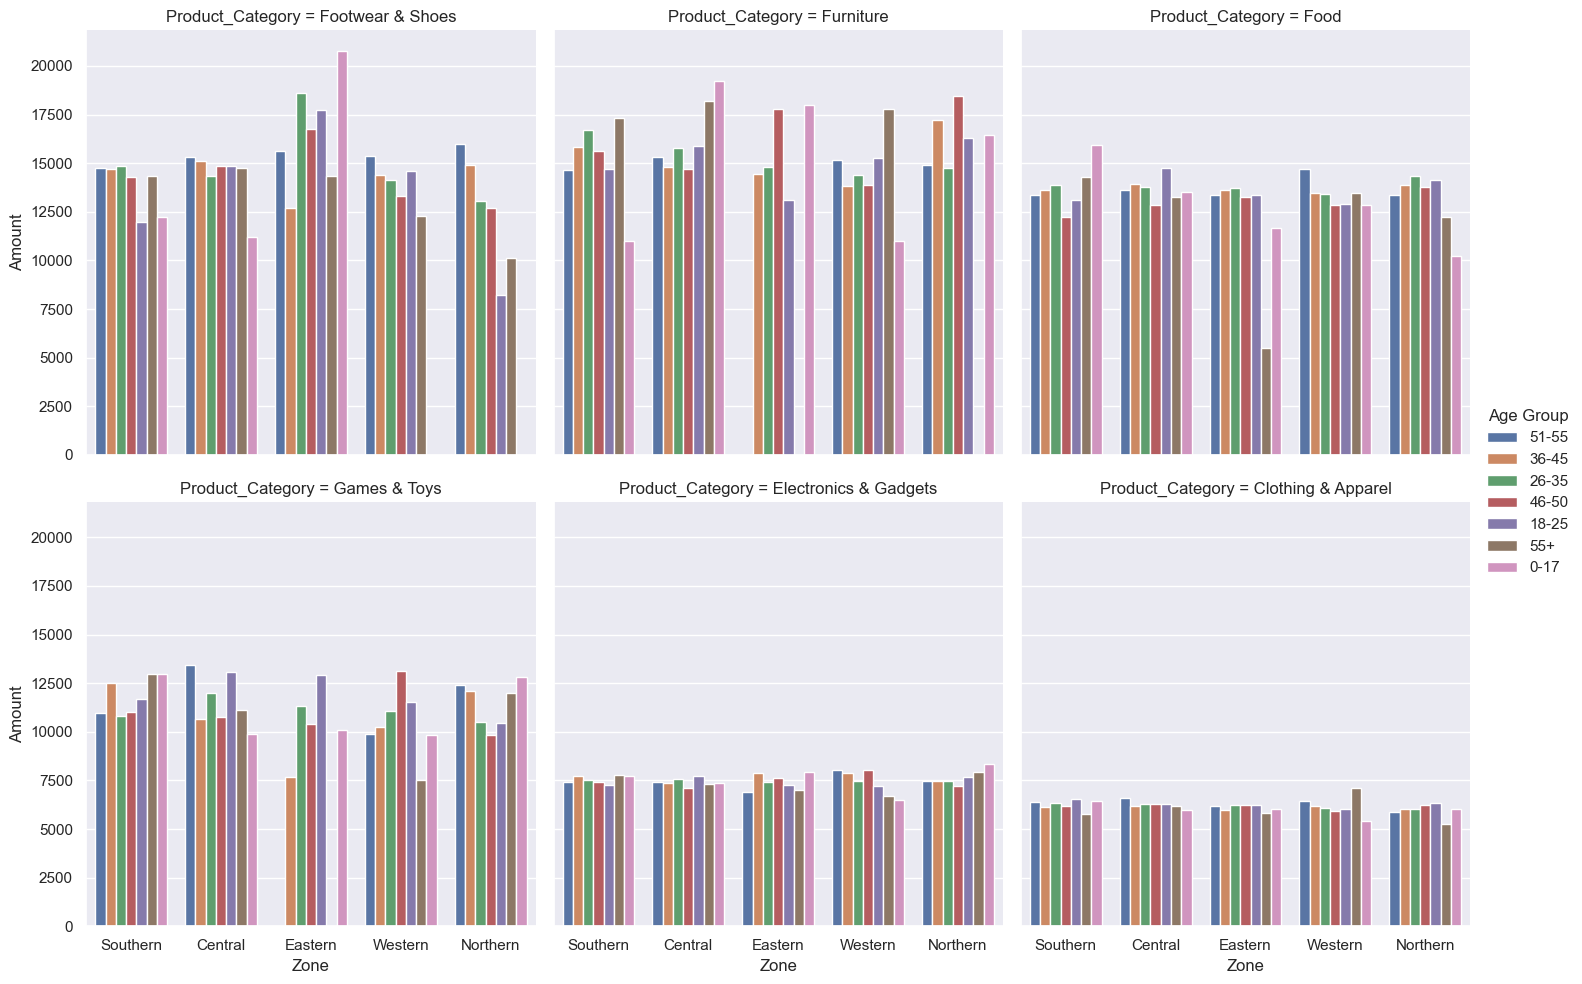

In [81]:
# Calculate the total amount spent per product category
top_product_categories = df.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False).head(6)

# Filter the original data to only include these top 6 categories
filtered_data = df[df['Product_Category'].isin(top_product_categories.index)]

# Create a relational plot for the top 6 product categories
sns.catplot(x='Zone', y='Amount', data=filtered_data, kind='bar', hue='Age Group', col='Product_Category', col_wrap=3, errorbar=None)
plt.show()

# Region-wise Product Category Distribution

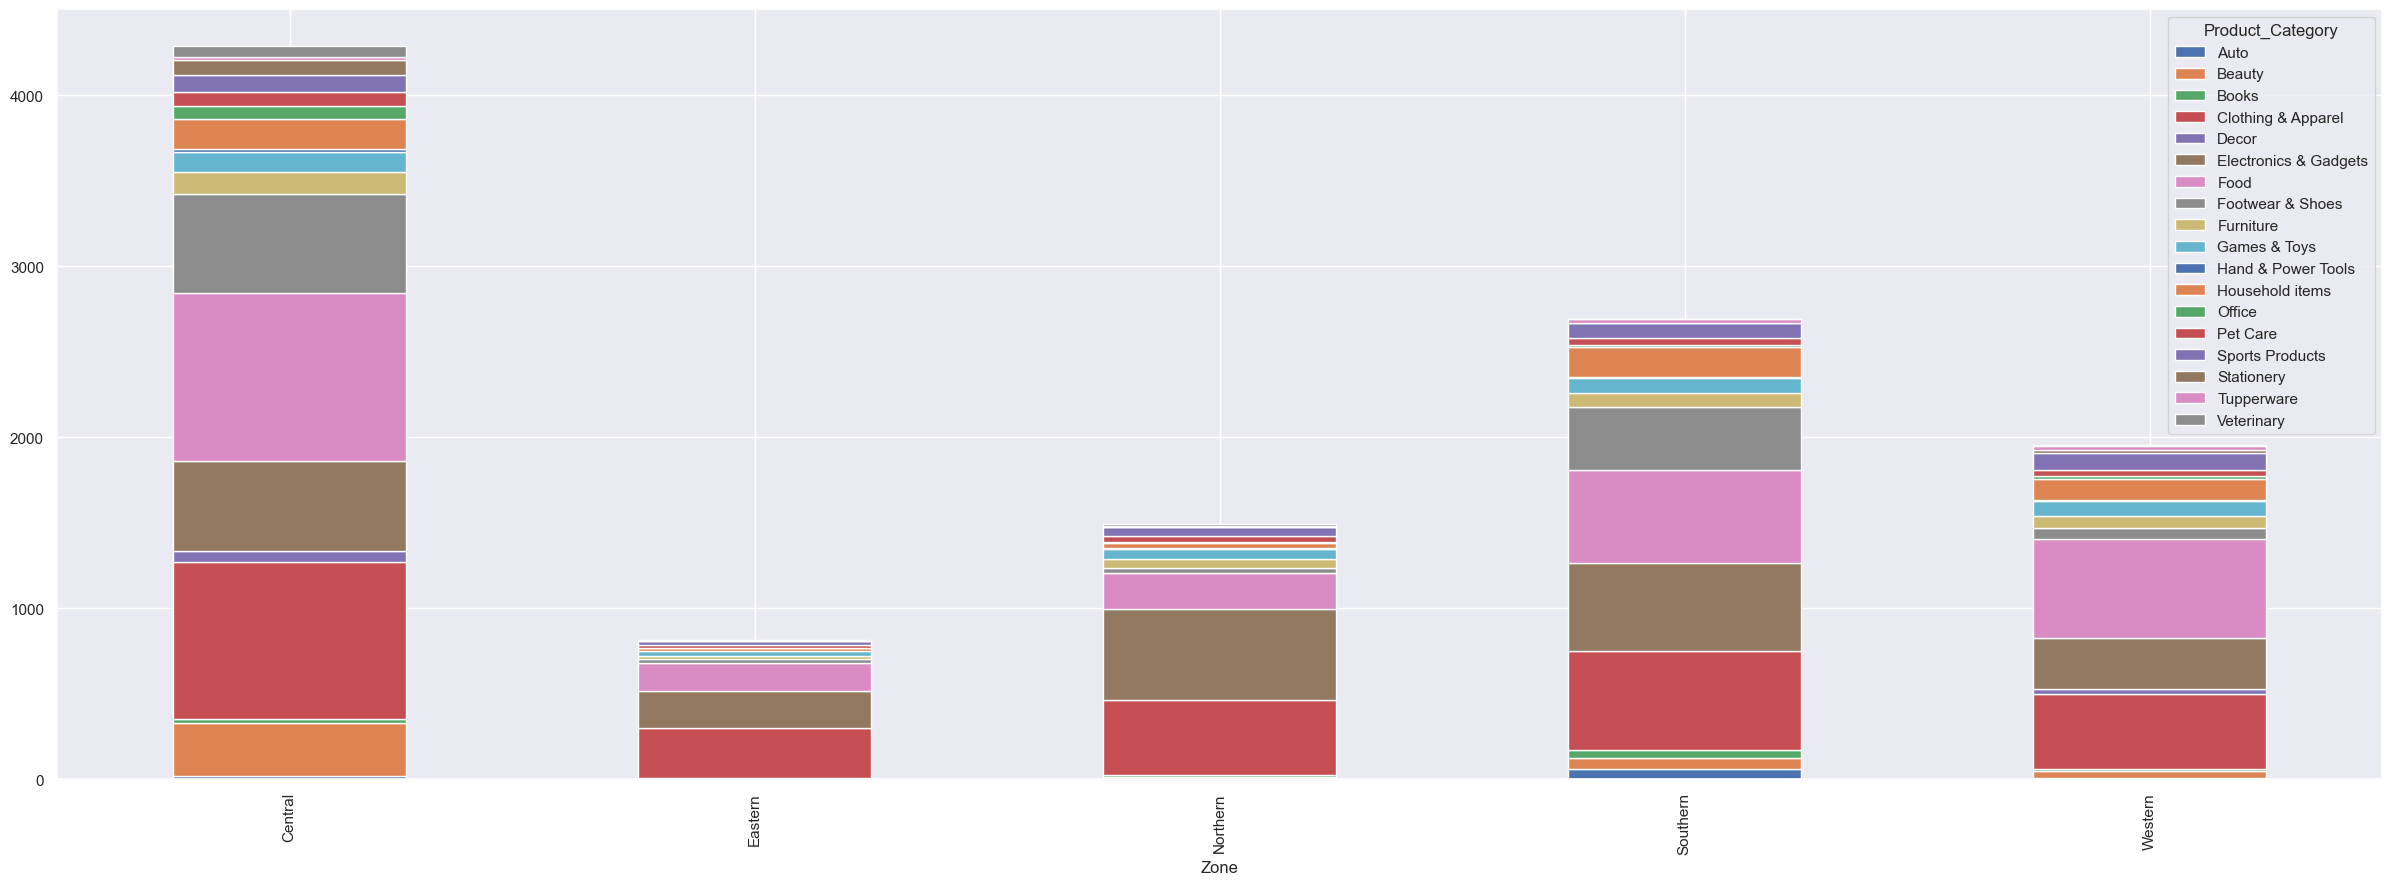

In [101]:
region_product = pd.crosstab(df['Zone'], df['Product_Category'])
region_product.plot(kind='bar', stacked=True)
sns.set(rc={'figure.figsize':(30,10)})

# Number of customer of different age group for different product category

<Axes: xlabel='Age Group', ylabel='Product_Category'>

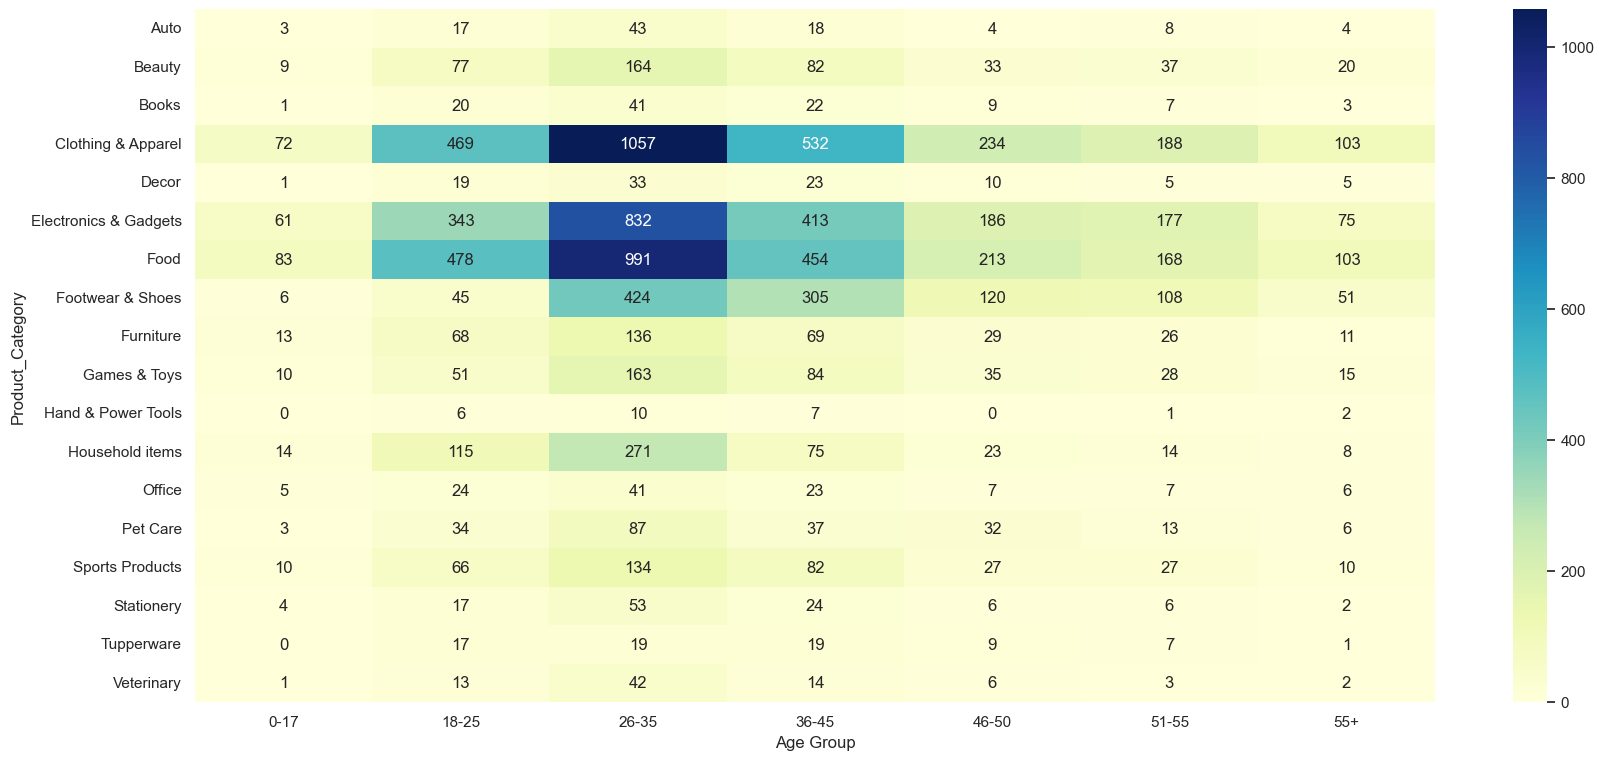

In [83]:
sns.set(rc={'figure.figsize':(20,9)})
product_demographics = pd.crosstab(df['Product_Category'], df['Age Group'])
sns.heatmap(product_demographics, cmap="YlGnBu", annot=True, fmt="d")

# Number of customers of different occupations

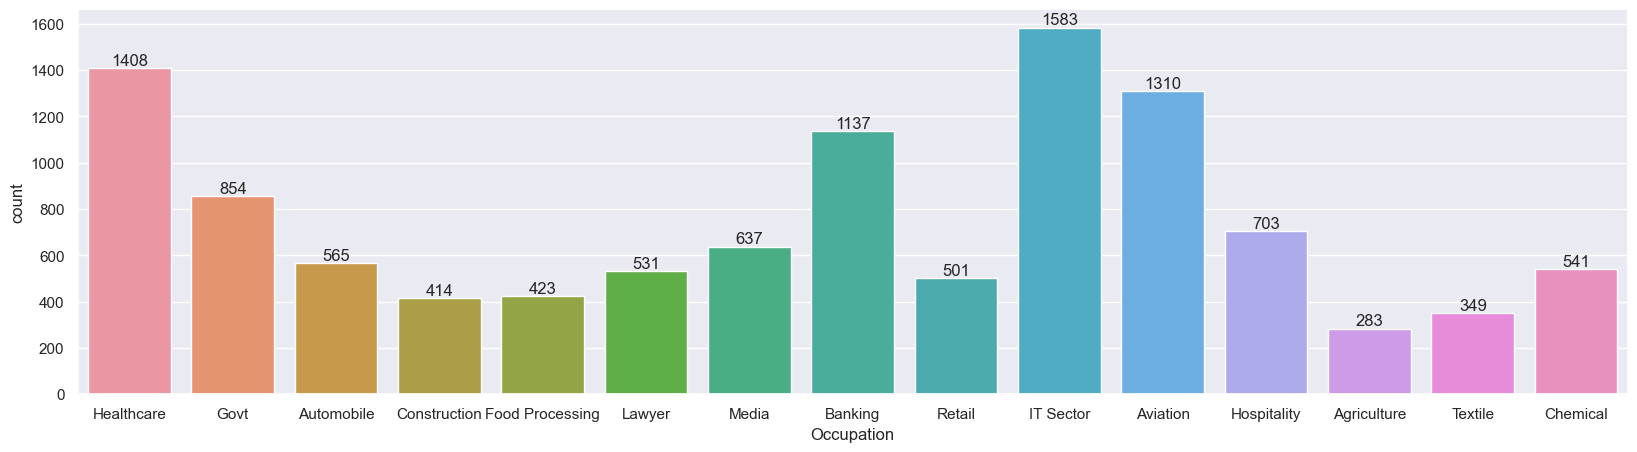

In [86]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

#  Top 10 Customers's Occupation having high number of orders

<Axes: xlabel='Occupation', ylabel='Orders'>

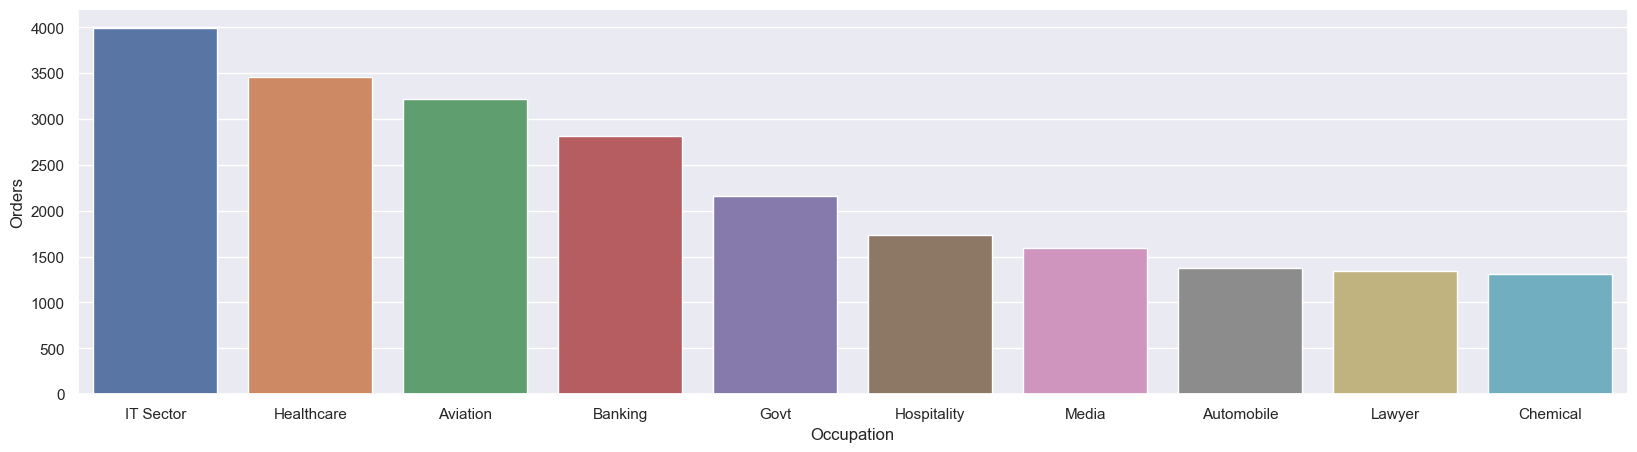

In [95]:
sales_state = df.groupby(['Occupation'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.barplot(data = sales_state, x = 'Occupation',y= 'Orders')

# Sales Contribution by different Occupations (in percent)

<Axes: ylabel='Amount'>

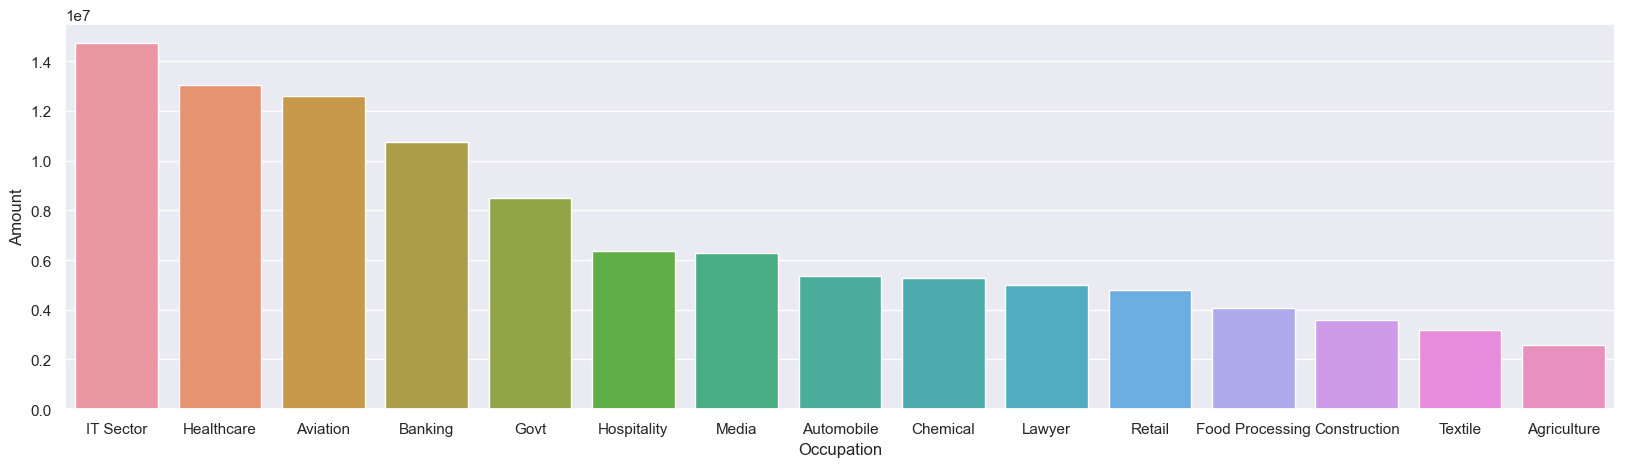

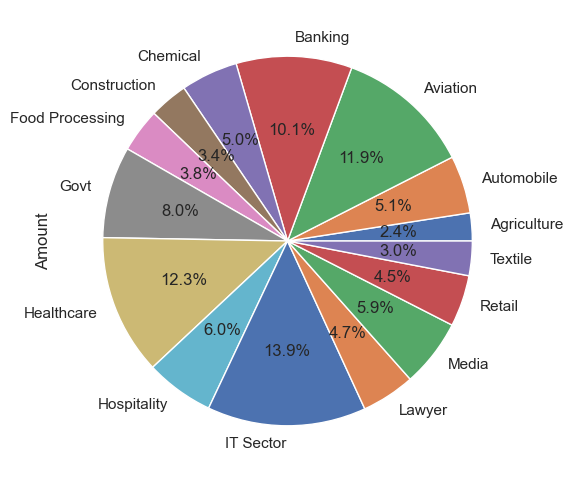

In [88]:
# How do different occupations contribute to the overall sales?

sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')


# Sales Contribution by Occupation in percent

plt.figure(figsize=(8, 6)) 
occupation_sales = df.groupby('Occupation')['Amount'].sum()
occupation_sales.plot(kind='pie', autopct='%1.1f%%')

#  Top 10 states having high number of orders

<Axes: xlabel='State', ylabel='Orders'>

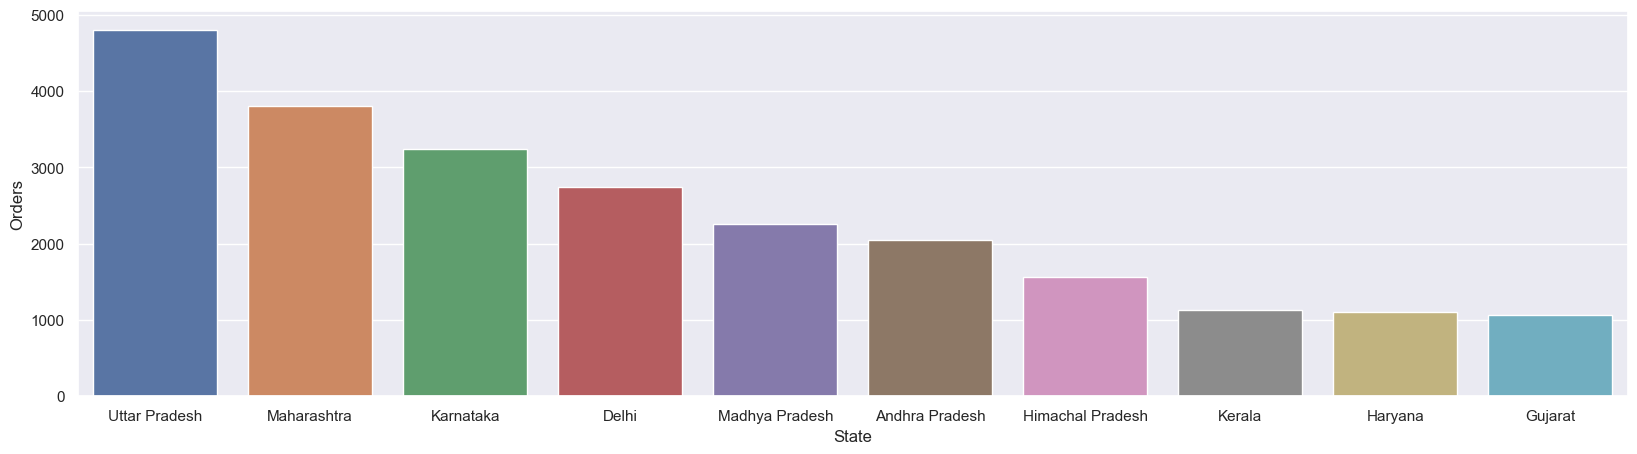

In [89]:
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.barplot(data = sales_state, x = 'State',y= 'Orders')

# Number of customers from different states

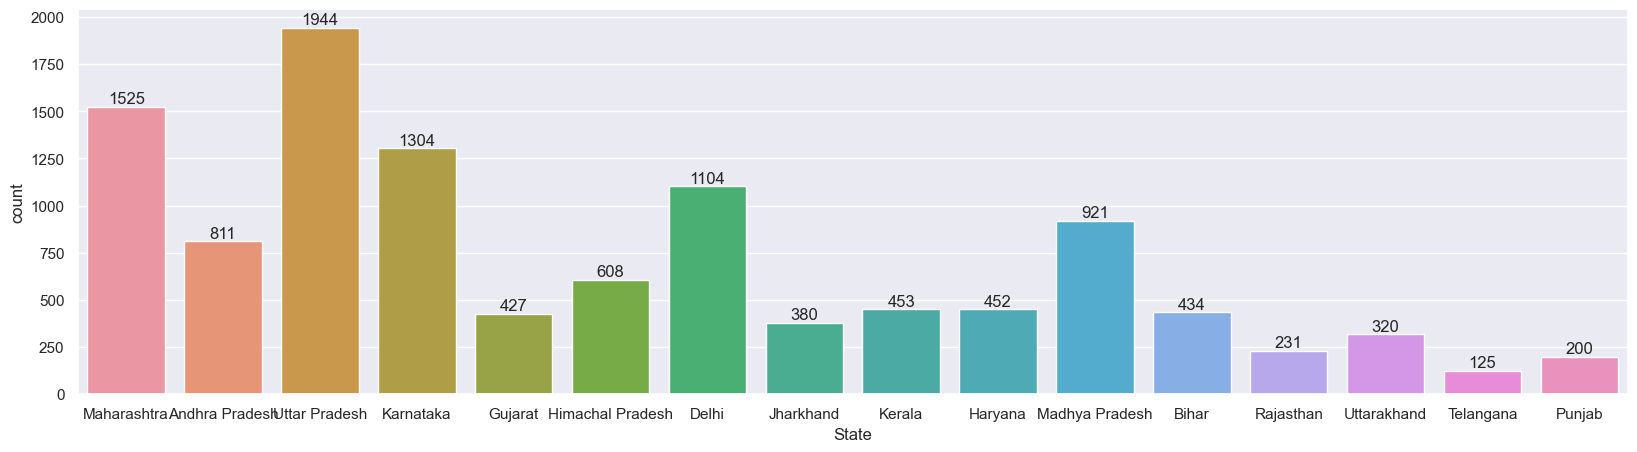

In [94]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'State')

for bars in ax.containers:
    ax.bar_label(bars)

# Sales contribution by States

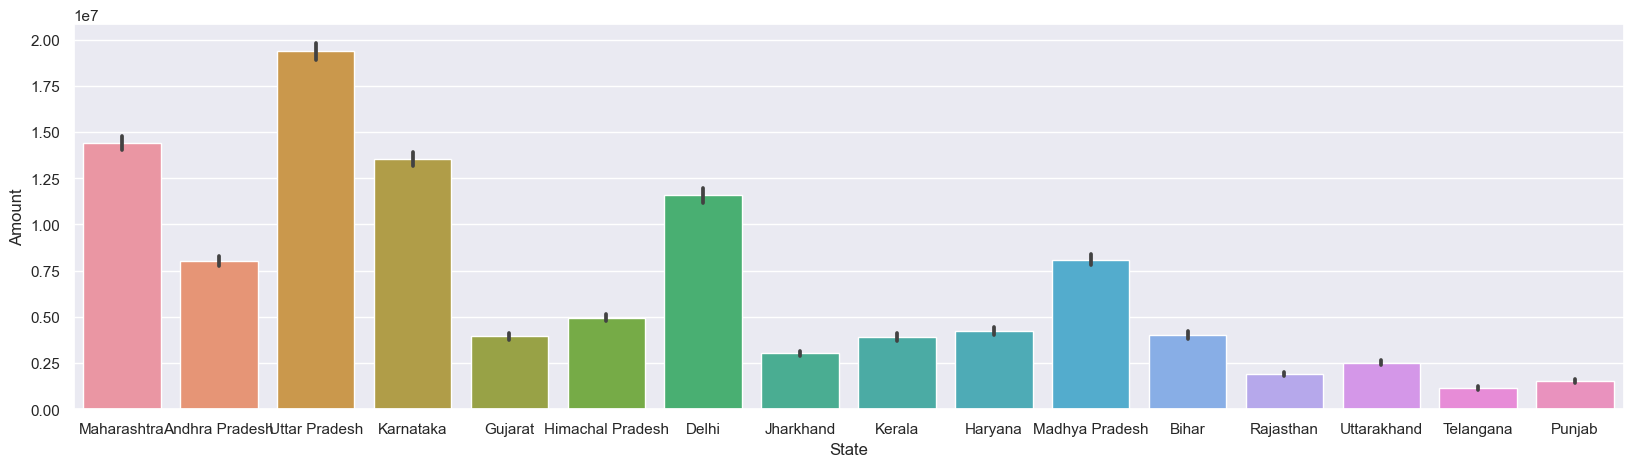

In [90]:
sns.barplot(x='State', y='Amount', data=df, estimator=sum)

sns.set(rc={'figure.figsize':(28,5)})

# Top 5 customers with their details having higher number of order

In [91]:
# Group by customer name and sum the number of orders
customer_orders =df.groupby('Cust_name')['Orders'].sum()

# Custom function to get the first mode
def first_mode(series):
    return series.mode().iloc[0]

# Grouping by 'Cust_name' and applying the custom aggregation functions
customer_details = df.groupby('Cust_name').agg({
    'Occupation': first_mode,       # Most common occupation
    'State': first_mode,            # Most common state
    'Product_Category': first_mode  # Most common product category
})
# Combine the results
top_customers = customer_orders.sort_values(ascending=False).head(5).reset_index()
top_customers_df = pd.merge(top_customers, customer_details, on='Cust_name')

# Rename columns for clarity
top_customers_df.columns = ['Customer Name', 'Orders', 'Occupation', 'State', 'Product Category']

# Display the top 5 customers with their details
print(top_customers_df)


  Customer Name  Orders   Occupation           State       Product Category
0      Vishakha     106     Aviation     Maharashtra                   Food
1      Shreyshi      75    IT Sector           Delhi     Clothing & Apparel
2     Alejandro      73  Agriculture  Madhya Pradesh  Electronics & Gadgets
3        Sudevi      71     Aviation       Karnataka                   Food
4        Akshat      69    IT Sector           Delhi     Clothing & Apparel


# Top 5 customers with their details have Purchases the most

In [92]:
# Group by customer name and sum the number of orders
customer_amt =df.groupby('Cust_name')['Amount'].sum()

# Combine the results
top_customers_amt = customer_amt.sort_values(ascending=False).head(5).reset_index()
top_customers_amt_df = pd.merge(top_customers_amt, customer_details, on='Cust_name')

# Rename columns for clarity
top_customers_amt_df.columns = ['Customer Name', 'Amount', 'Occupation', 'State', 'Product Category']

# Display the top 5 customers with their details
print(top_customers_amt_df)


  Customer Name  Amount   Occupation           State       Product Category
0      Vishakha  382782     Aviation     Maharashtra                   Food
1        Sudevi  287142     Aviation       Karnataka                   Food
2       Vasudev  281034   Healthcare   Uttar Pradesh                   Food
3         Neola  275234    IT Sector       Karnataka                   Food
4     Alejandro  272517  Agriculture  Madhya Pradesh  Electronics & Gadgets


#  Frequency of different spending amounts

<Axes: xlabel='Amount', ylabel='Count'>

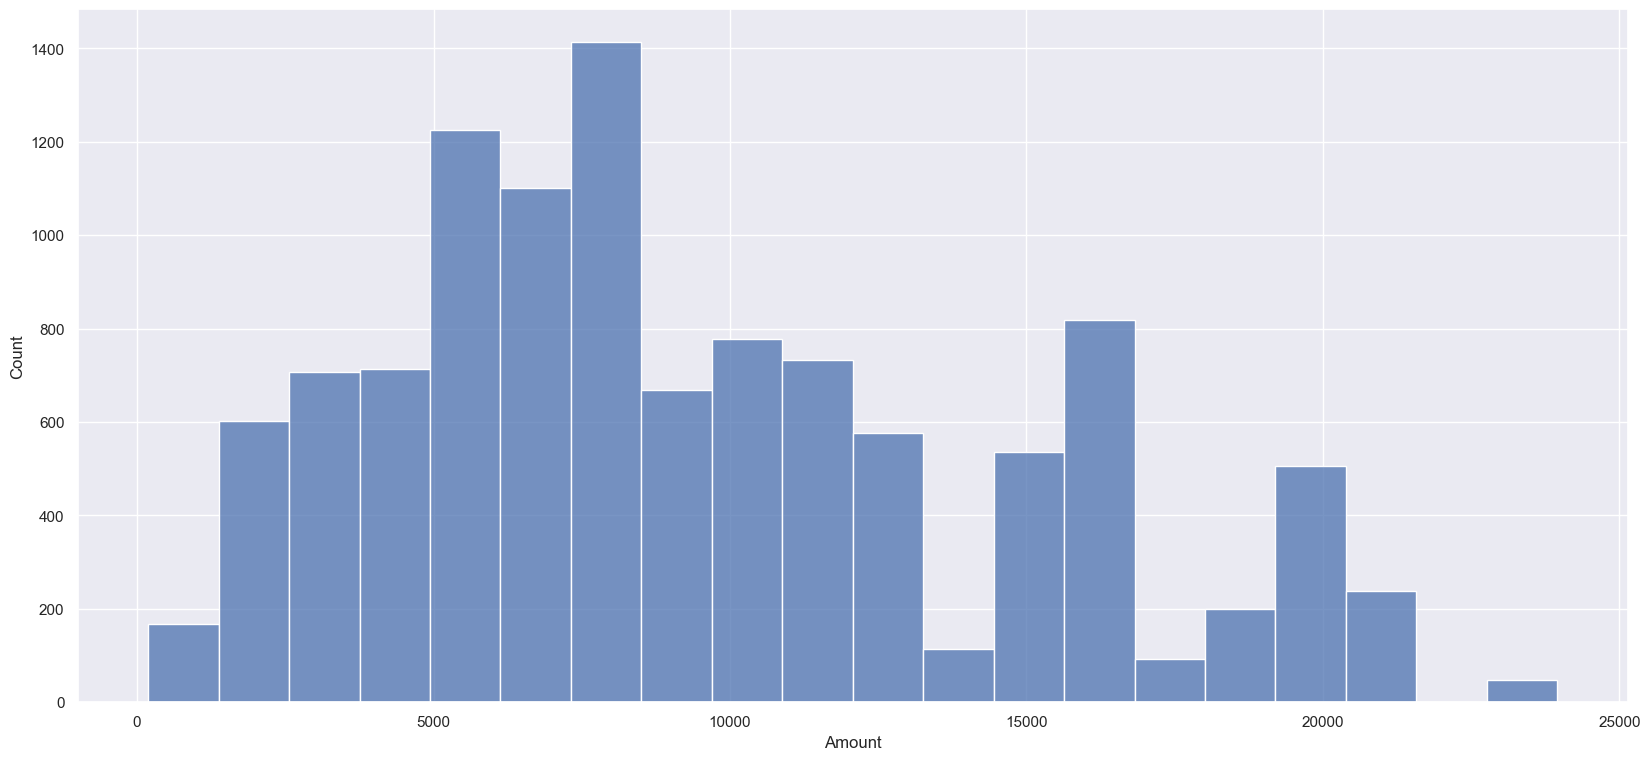

In [93]:
sns.set(rc={'figure.figsize':(20,9)})
sns.histplot(df['Amount'], bins=20)

# Conclusion


1. Maximum orders and sales are from the product category like Electronics & Gadgets, food, clothing apparels.
2. Orders are more from Central Zone but sales are more in southern part.
3. Customer working in IT sector, healthcare and aviation are major conrtibuted to sales.
4. Umarried females of age group of 26-35 have ordered most.
5. Customer from age group of 26-35 buys moslty clothing apparels.
6. Most Common Spending Ranges is in between 5000 and 10000.